In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv("Churn_Modelling.csv")

In [137]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [139]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [141]:
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)

In [145]:
X_train_cnn = np.array(X_train, dtype=np.float32)
X_test_cnn = np.array(X_test, dtype=np.float32)

X_train_cnn = np.expand_dims(X_train_cnn, axis=2)  
X_test_cnn = np.expand_dims(X_test_cnn, axis=2)

In [147]:
y_train_cnn = to_categorical(y_train, num_classes=2)  
y_test_cnn = to_categorical(y_test, num_classes=2)

In [149]:
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),  # kernel_size 2
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Çıkış katmanı
])

C:\Users\sinan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [153]:
cnn_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test_cnn), verbose=1)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7656 - loss: 0.5327 - val_accuracy: 0.7970 - val_loss: 0.4660
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8001 - loss: 0.4579 - val_accuracy: 0.8067 - val_loss: 0.4358
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4332 - val_accuracy: 0.8130 - val_loss: 0.4384
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8098 - loss: 0.4321 - val_accuracy: 0.8203 - val_loss: 0.4090
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8103 - loss: 0.4273 - val_accuracy: 0.8243 - val_loss: 0.4057
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8286 - loss: 0.3995 - val_accuracy: 0.8290 - val_loss: 0.3915
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8262 - loss: 0.3937 - val_accuracy: 0.8373 - val_loss: 0.3932
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8385 - loss: 0.3862 - val_accuracy: 0.

In [155]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)  # Çıkış sınıfını alma
y_test_classes_cnn = np.argmax(y_test_cnn, axis=1)  # Gerçek sınıflar

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [157]:
print("CNN Accuracy: ", accuracy_score(y_test_classes_cnn, y_pred_classes_cnn))
print("CNN Precision: ", precision_score(y_test_classes_cnn, y_pred_classes_cnn))
print("CNN Recall: ", recall_score(y_test_classes_cnn, y_pred_classes_cnn))
print("CNN F1-Score: ", f1_score(y_test_classes_cnn, y_pred_classes_cnn))

CNN Accuracy:  0.8493333333333334
CNN Precision:  0.79182156133829
CNN Recall:  0.3497536945812808
CNN F1-Score:  0.48519362186788156


In [159]:
cnn_conf_matrix = confusion_matrix(y_test_classes_cnn, y_pred_classes_cnn)
print(cnn_conf_matrix)

[[2335   56]
 [ 396  213]]


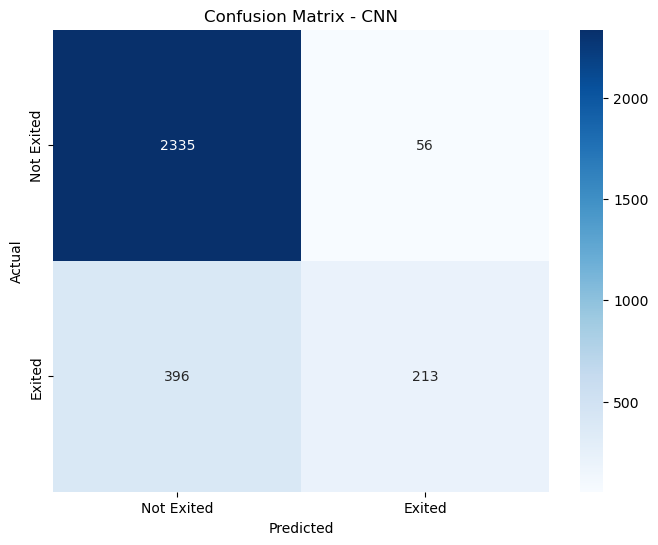

In [161]:
cnn_conf_matrix = confusion_matrix(y_test_classes_cnn, y_pred_classes_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [199]:
X_test_cnn = X_test_cnn.astype(np.float32)
y_test_cnn = y_test_cnn.astype(np.float32)

X_test_cnn shape: (3000, 11, 1)
y_test_cnn shape: (3000, 2)
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
y_prob_cnn shape: (3000,)
y_test_classes_cnn shape: (3000,)


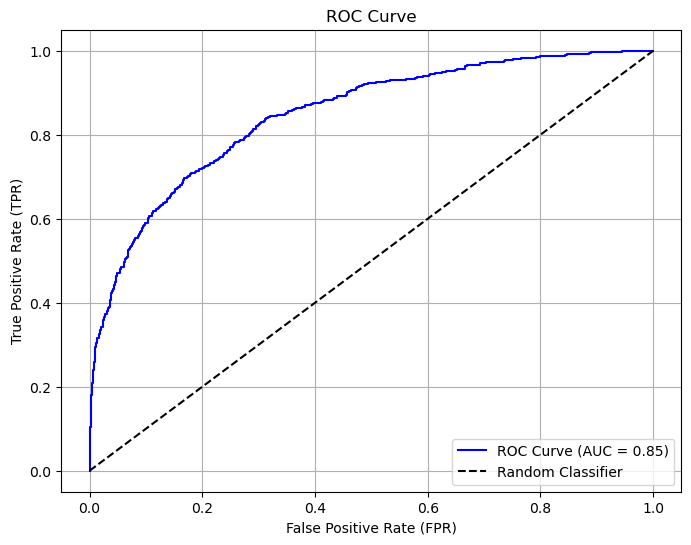

In [201]:

print(f"X_test_cnn shape: {X_test_cnn.shape}")
print(f"y_test_cnn shape: {y_test_cnn.shape}")


y_prob_cnn = cnn_model.predict(X_test_cnn)[:, 1] 
print(f"y_prob_cnn shape: {y_prob_cnn.shape}")


y_test_classes_cnn = np.argmax(y_test_cnn, axis=1)
print(f"y_test_classes_cnn shape: {y_test_classes_cnn.shape}")


from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_classes_cnn, y_prob_cnn)
auc = roc_auc_score(y_test_classes_cnn, y_prob_cnn)


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


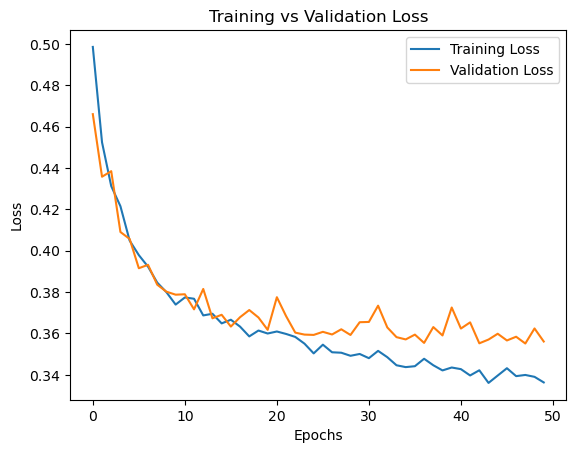

In [209]:
# Eğitim ve Doğrulama Loss grafiği
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


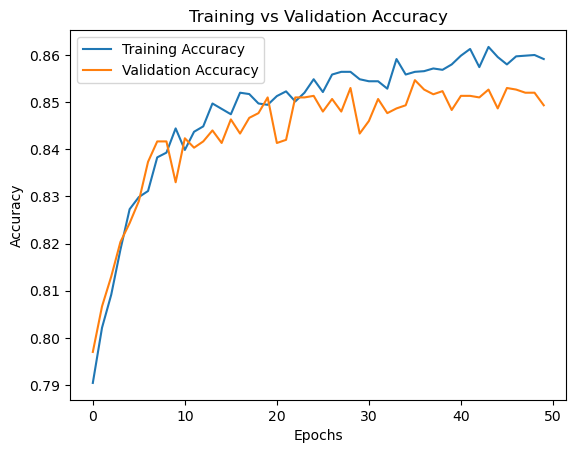

In [211]:
# Eğitim ve Doğrulama Accuracy grafiği
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
